importing Jupyter notebook from lr3_x.ipynb
Исходный ряд:
 [405 521 382 362 444 465 513 362 550 453 482 431 437 352 351 498 510 547
 477 428 458 470 499 418 477 468 545 441 543 474 321 438 409 451 462 541
 460 358 353 508 379 458 548 447 446 483 528 462 453 393 487 430 371 441
 495 510 496 525 377 512 382 480 391 448 540 421 453 441 452 476 464 449
 331 444 423 446 451 434 469 452 397 470 351 430 541 467 394 406 477 424
 475 352 391 482 453 465 458 482 448 411 452 504 454 422 443 510 448 442
 423 504 471 493 544 460]
Ранжированный ряд:
 [321 331 351 351 352 352 353 358 362 362 371 377 379 382 382 391 391 393
 394 397 405 406 409 411 418 421 422 423 423 424 428 430 430 431 434 437
 438 441 441 441 442 443 444 444 446 446 447 448 448 448 449 451 451 452
 452 452 453 453 453 453 454 458 458 458 460 460 462 462 464 465 465 467
 468 469 470 470 471 474 475 476 477 477 477 480 482 482 482 483 487 493
 495 496 498 499 504 504 508 510 510 510 512 513 521 525 528 540 541 541
 543 544 545 547 54

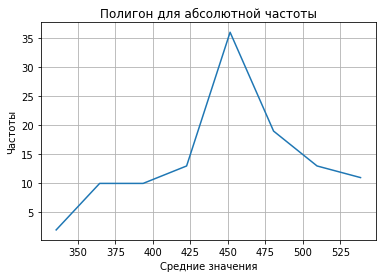

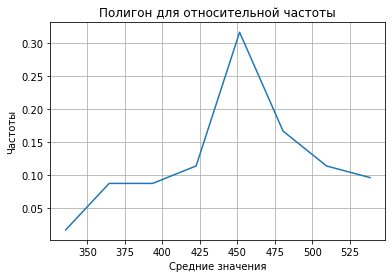

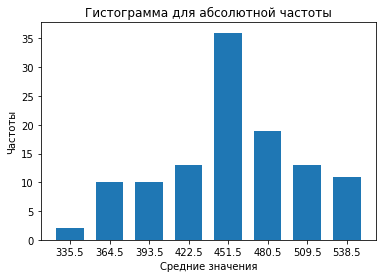

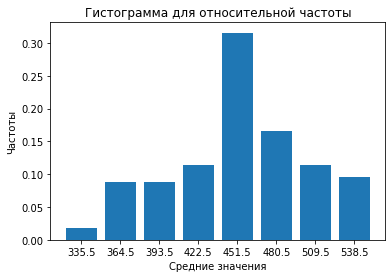

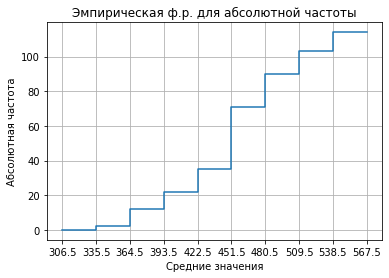

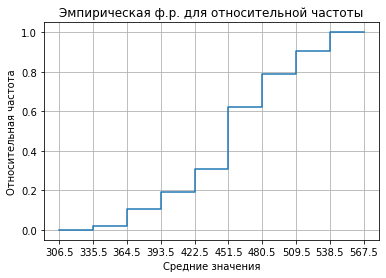

   Средние значения  Частоты  Условные варианты   nu1   nu2    nu3    nu4  \
0             335.5        2               -4.0  -8.0  32.0 -128.0  512.0   
1             364.5       10               -3.0 -30.0  90.0 -270.0  810.0   
2             393.5       10               -2.0 -20.0  40.0  -80.0  160.0   
3             422.5       13               -1.0 -13.0  13.0  -13.0   13.0   
4             451.5       36                0.0   0.0   0.0    0.0    0.0   
5             480.5       19                1.0  19.0  19.0   19.0   19.0   
6             509.5       13                2.0  26.0  52.0  104.0  208.0   
7             538.5       11                3.0  33.0  99.0  297.0  891.0   

   Проверка  
0     162.0  
1     160.0  
2      10.0  
3       0.0  
4      36.0  
5     304.0  
6    1053.0  
7    2816.0  
Условный эмпирический момент 1 порядка: 0.06140350877192982
Условный эмпирический момент 2 порядка: 3.026315789473684
Условный эмпирический момент 3 порядка: -0.6228070175438597
Ус

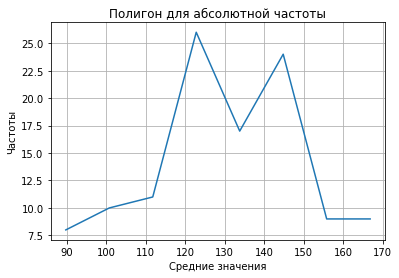

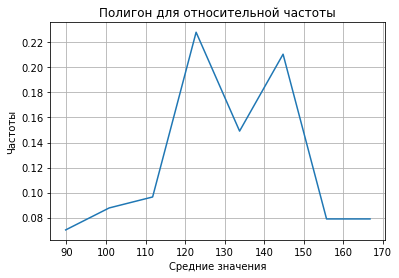

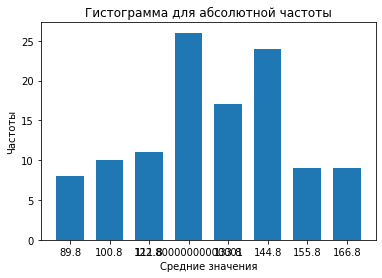

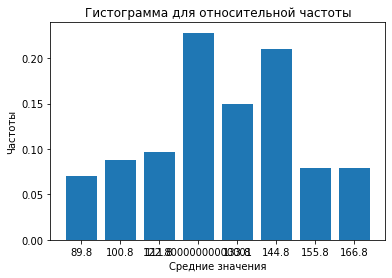

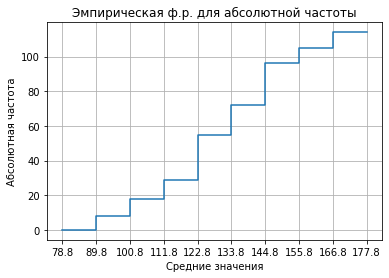

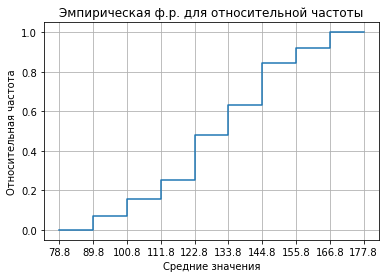

   Средние значения  Частоты  Условные варианты   nu1    nu2    nu3     nu4  \
0              89.8        8               -4.0 -32.0  128.0 -512.0  2048.0   
1             100.8       10               -3.0 -30.0   90.0 -270.0   810.0   
2             111.8       11               -2.0 -22.0   44.0  -88.0   176.0   
3             122.8       26               -1.0 -26.0   26.0  -26.0    26.0   
4             133.8       17                0.0   0.0    0.0    0.0     0.0   
5             144.8       24                1.0  24.0   24.0   24.0    24.0   
6             155.8        9                2.0  18.0   36.0   72.0   144.0   
7             166.8        9                3.0  27.0   81.0  243.0   729.0   

   Проверка  
0     648.0  
1     160.0  
2      11.0  
3       0.0  
4      17.0  
5     384.0  
6     729.0  
7    2304.0  
Условный эмпирический момент 1 порядка: -0.3596491228070178
Условный эмпирический момент 2 порядка: 3.763157894736844
Условный эмпирический момент 3 порядка: -4.8

In [1]:
import import_ipynb
import lr3_x as X
import lr3_y as Y

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
def localize_space(space):
    return "[{};{})".format(space[0], space[1])

In [4]:
def _value_in_space(value, space):
    return space[0] <= value and value < space[1] 

_source = pd.read_csv('dataset.csv', header=None)
cor = pd.DataFrame()

#cor[0] = [localize_space(X.spaces[i]) for i in range(len(X.spaces))]

for _y, space_y in enumerate(Y.spaces):
    _col = []
    for space_x in X.spaces:
        _count = 0
        for row in _source.iterrows():
            if _value_in_space(row[1][0], space_x) and _value_in_space(row[1][1], space_y):
                _count += 1
        _col.append(_count)
    cor[_y] = _col

cor


,0,1,2,3,4,5,6,7
0,2,0,0,0,0,0,0,0
1,5,4,1,0,0,0,0,0
2,1,3,6,0,0,0,0,0
3,0,3,2,6,1,1,0,0
4,0,0,2,19,11,4,0,0
5,0,0,0,1,4,12,2,0
6,0,0,0,0,1,4,4,4
7,0,0,0,0,0,3,3,5


In [5]:
_rowsIndex = pd.Index([*[localize_space(i) for i in X.spaces], "N"], name="X")
_colsIndex = pd.Index([*[localize_space(i) for i in Y.spaces], "N"], name="Y")
cor1 = cor.copy()
cor1[len(cor1)] = [cor1.iloc[i,:].sum() for i in range(len(X.spaces))]
_sums = [cor1.iloc[:,i].sum() for i in range(len(Y.spaces) + 1)]
cor1 = pd.concat([cor1, pd.DataFrame([_sums])])
cor1.index = _rowsIndex
cor1.columns = _colsIndex
cor1

Y,[84.3;95.3),[95.3;106.3),[106.3;117.3),[117.3;128.3),[128.3;139.3),[139.3;150.3),[150.3;161.3),[161.3;172.3),N
X,,,,,,,,,
[321;350),2,0,0,0,0,0,0,0,2
[350;379),5,4,1,0,0,0,0,0,10
[379;408),1,3,6,0,0,0,0,0,10
[408;437),0,3,2,6,1,1,0,0,13
[437;466),0,0,2,19,11,4,0,0,36
[466;495),0,0,0,1,4,12,2,0,19
[495;524),0,0,0,0,1,4,4,4,13
[524;553),0,0,0,0,0,3,3,5,11
N,8,10,11,26,17,24,9,9,114


In [6]:
import lr2_x
import lr2_y

v_x = np.array(list(map(int, np.round(lr2_x.df["Условные варианты"]))))
v_y = np.array(list(map(int, np.round(lr2_y.df["Условные варианты"]))))

_rowsIndex = pd.Index([*v_x, "n_u"], name="u")
_colsIndex = pd.Index([*v_y, "n_v"], name="v")
cor2 = cor1.copy()
cor2.index = _rowsIndex
cor2.columns = _colsIndex
cor2

v,-4,-3,-2,-1,0,1,2,3,n_v
u,,,,,,,,,
-4,2,0,0,0,0,0,0,0,2
-3,5,4,1,0,0,0,0,0,10
-2,1,3,6,0,0,0,0,0,10
-1,0,3,2,6,1,1,0,0,13
0,0,0,2,19,11,4,0,0,36
1,0,0,0,1,4,12,2,0,19
2,0,0,0,0,1,4,4,4,13
3,0,0,0,0,0,3,3,5,11
n_u,8,10,11,26,17,24,9,9,114


In [7]:
cor3 = cor2.copy()

for i in range(len(v_x)):
    cor3.iloc[i,:-1] *= v_x[i]

for i in range(len(v_y)):
    cor3.iloc[:-1,i] *= v_y[i]

cor3.iloc[:,-1] = cor3.iloc[:,:-1].sum(axis=1)
cor3.iloc[-1,:] = cor3.iloc[:-1,:].sum(axis=0)
cor3

v,-4,-3,-2,-1,0,1,2,3,n_v
u,,,,,,,,,
-4,32,0,0,0,0,0,0,0,32
-3,60,36,6,0,0,0,0,0,102
-2,8,18,24,0,0,0,0,0,50
-1,0,9,4,6,0,-1,0,0,18
0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,0,12,4,0,15
2,0,0,0,0,0,8,16,24,48
3,0,0,0,0,0,9,18,45,72
n_u,100,63,34,5,0,28,38,69,337


## Вычисление выборочного коэффициента коррелации при помощи условных вариант

In [8]:
_N = lr2_x.N 
_sum = cor3["n_v"]["n_u"]

_counts_x = np.array(list(cor2.iloc[:-1,-1]))
_counts_y = np.array(list(cor2.iloc[-1,:-1]))

_x_mean = sum(_counts_x * v_x) / _N
_y_mean = sum(_counts_y * v_y) / _N

_x_s = np.sqrt((sum(_counts_x * v_x**2) / _N - _x_mean**2))
_y_s = np.sqrt((sum(_counts_y * v_y**2) / _N - _y_mean**2))

r_variants = (_sum - _N * _x_mean * _y_mean) / (_N * _x_s * _y_s)
r_variants 

0.8986484318945402

## Вычисление выборочного коэффициента коррелации стандартным способом

In [9]:
def space_middle(space):
    return (space[1] - space[0]) / 2 + space[0]

_middles_x = list(map(space_middle, X.spaces))
_middles_y = list(map(space_middle, Y.spaces))
cor4 = cor2.copy()

for i in range(len(v_x)):
    cor4.iloc[i,:-1] *= _middles_x[i]

for i in range(len(v_y)):
    cor4.iloc[:-1,i] *= _middles_y[i]

cor4.iloc[:,-1] = cor4.iloc[:,:-1].sum(axis=1)
cor4.iloc[-1,:] = cor4.iloc[:-1,:].sum(axis=0)

_rowsIndex = pd.Index([*_middles_x, "n_u"], name="u")
_colsIndex = pd.Index([*_middles_y, "n_v"], name="v")
cor4.index = _rowsIndex
cor4.columns = _colsIndex

In [10]:
_N = lr2_x.N 
_sum = cor4["n_v"]["n_u"]
r_standard = (_sum - _N * lr2_x.x_middle * lr2_y.x_middle) / (_N * math.sqrt(lr2_x.S2) * math.sqrt(lr2_y.S2))
r_standard

0.8907655509130148

## Построение доверительного интервала

In [24]:
from scipy.stats import norm

_N = X.N

def _trust_interval(_g):
    _q = 1 - _g
    _l = norm.ppf(1 - _q/2)
    _z = 0.5 * np.log((1 + r_standard) / (1 - r_standard))
    _sigma_z = 1 / np.sqrt(_N - 3)
    _z_space = [_z - _l * _sigma_z, _z + _l * _sigma_z]
    _r_space = np.tanh(_z_space)
    print("Доверительный интервал для доверительной вероятности {}: \n\t{} < z < {}, \n\t{} < r < {}".format(_g, *_z_space, *_r_space))
    
_trust_interval(0.95)
_trust_interval(0.99)

Доверительный интервал для доверительной вероятности 0.95: 
	1.2395887502906935 < z < 1.6116518477533175, 
	0.8453382645322609 < r < 0.9234037598334105
Доверительный интервал для доверительной вероятности 0.99: 
	1.1811334011063026 < z < 1.6701071969377084, 
	0.8278086643776805 < r < 0.9315658558635433


## Проверка статистической гипотезы при уровне значимости a=0.05

In [25]:
from scipy.stats import t

_a = 0.05
_N = X.N
_t_obs = r_standard * np.sqrt((_N-2) / (1 - r_standard**2))
_t_crit = t.ppf(1 - _a/2, df=(_N-2))
print("Если T_наблюдаемое < T_критическое, то гипотеза принимается. В нашем случае {} < {}".format(_t_obs, _t_crit))

Если T_наблюдаемое < T_критическое, то гипотеза принимается. В нашем случае 20.74310532136146 < 1.9813718148344004
